# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

In [259]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

In [260]:
from sklearn import datasets

In [261]:
# Carregando o dataset para o Array chamado iris
iris = datasets.load_iris()

In [262]:
type(iris)

sklearn.utils.Bunch

In [263]:
# Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [264]:
# Nome das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [265]:
# Separando dados de treino.
treino = iris.data

In [266]:
# Separando dados de classes
classes = iris.target

In [267]:
# Visualizando a forma do array dos dados de treino.
# Formato (linhas, colunas)
treino.shape

(150, 4)

In [268]:
# Visualizando os dados de treino.
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [269]:
# Visualizando a forma do array de classes.
classes.shape

(150,)

In [270]:
#Visualizando os dados únicos do array de classes.
set(classes)

{0, 1, 2}

In [271]:
# Visualizando os dados de classes.
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualização de dados

* **Visualizando a disperssão de dados quanto a classe**

<IPython.core.display.Javascript object>


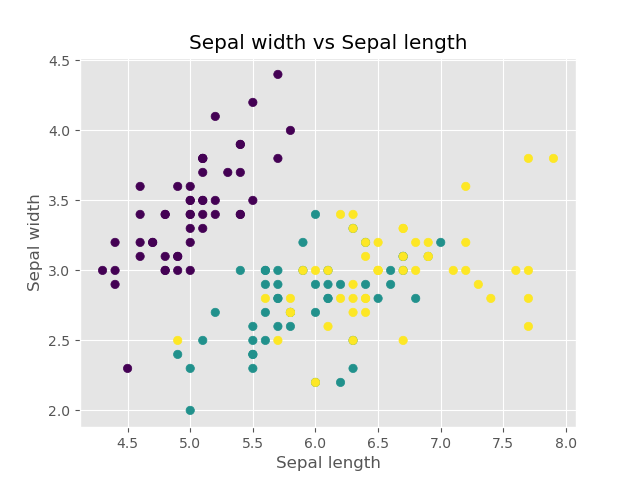

In [272]:
# Plota grãfico de dispersão dos dados com relalação a classe.
# Dispersão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

<IPython.core.display.Javascript object>


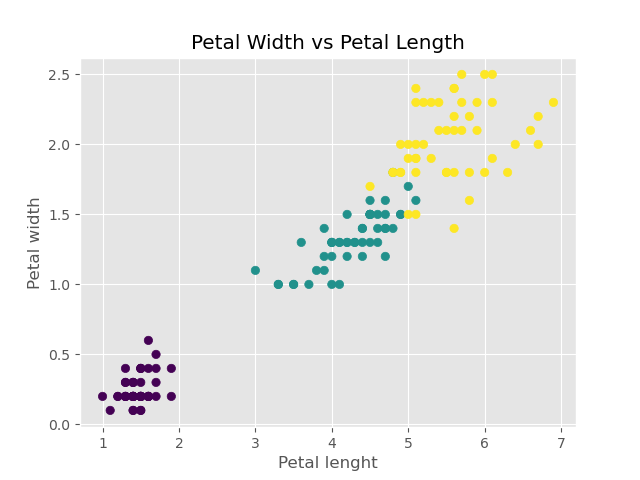

In [273]:
#Plota Grãfico de dispersão dos dados com relação a classe
#Dispersão dos dados de Petal width e Petal Length com as classes(0,1,2)
%matplotlib notebook
style.use("ggplot")
plt.xlabel("Petal lenght")
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

# Aplicando o SVM

* Vamos agora aplicar o SVM para classificar flores usando a base de dados Iris.

In [274]:
# Usaremos 80% dos dados para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [275]:
# Visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [276]:
# Visualizando as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [277]:
# Treinando o algorítmo de SVM
clf = svm.SVC().fit(treino[:-30],classes[:-30])

In [278]:
clf

SVC()

In [279]:
# Cria um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[-30:]

In [280]:
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [281]:
# Predizendo valores com a porção de dados de teste

clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [282]:
# Cria um array com as classes dos dados de teste.
classes_teste = classes[-30:]

In [283]:
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Visualizando os Resultados de Classificação

<IPython.core.display.Javascript object>


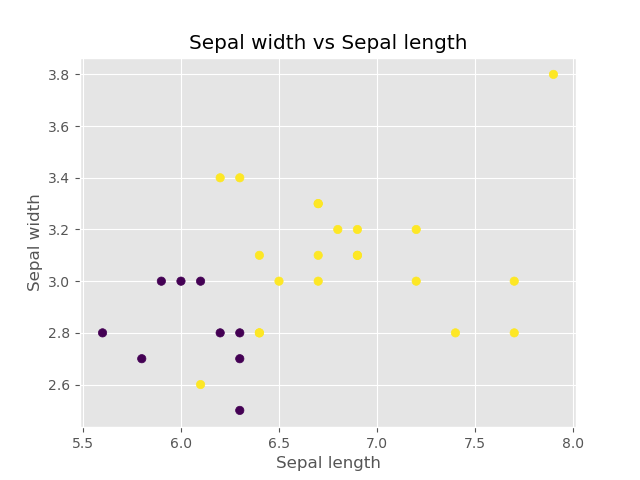

In [284]:
# Gráfico de disperssão entre as colunas Sepal Length , Sepatl width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

<IPython.core.display.Javascript object>


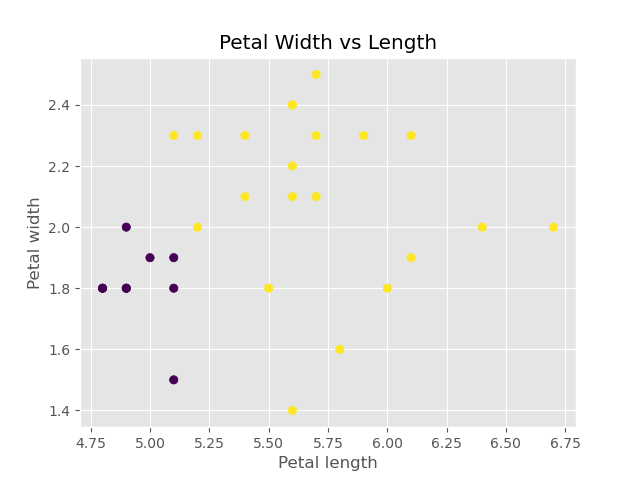

In [285]:
# Gráfico de disperssão entre as colunas Petal Length , Petal width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2],treino[-30:,3], c=clf.predict(teste))

<IPython.core.display.Javascript object>


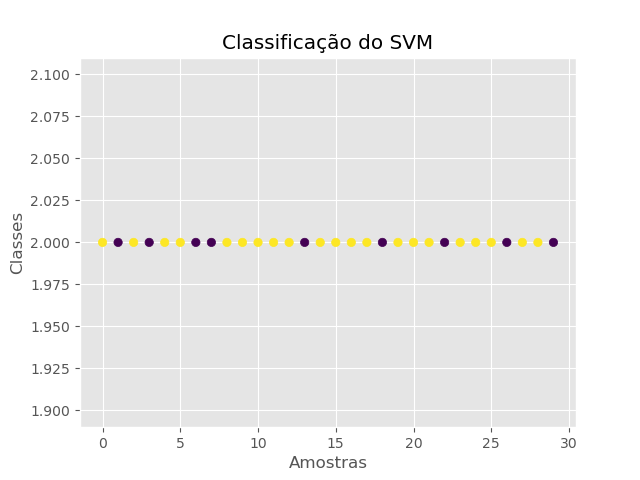

In [286]:
# Gráfico de instâncias e predição destas.
%matplotlib notebook
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

## Matriz de Confusão

In [287]:
print(pd.crosstab(classes_teste,
                  clf.predict(teste),
                  rownames=["Real"],
                  colnames=['Predito'],
                  margins=True),
      '')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


## Cross Vacalidation

In [288]:
# Função que retorna a acurácia após fazer uma validação cruzada(cross validation)
def Acuracia(clf,x,y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [289]:
Acuracia(clf,treino,classes)

0.9733333333333334

## Métricas de Avaliação

In [290]:
# Imprime as métricas: 'precisão, recall e Medida F1.
resultados = cross_val_predict(clf,treino,classes,cv=10)
valor_classes = [0,1,2]
print((metrics.classification_report(classes,resultados,valor_classes)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



C:\Users\marcf\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Base de dados de músicas do Spotify

In [327]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/
dataset = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\SVM-Materiais-Apoio\data.csv",
                     sep=',')

In [328]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Análise de Dados

In [329]:
#Checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [330]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [331]:
 # lista estilos disponíveis do Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


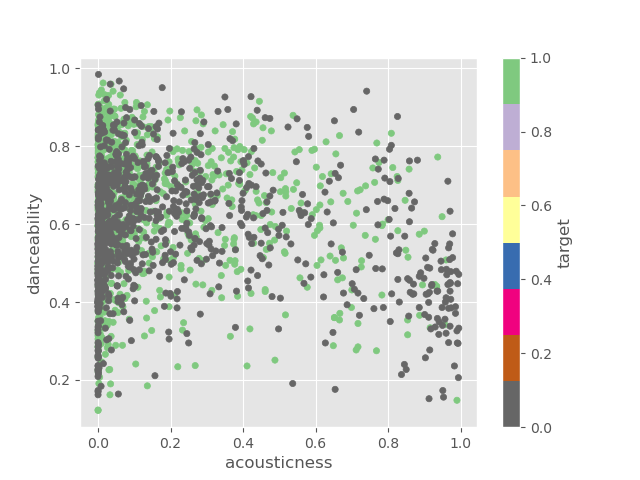

In [332]:
%matplotlib notebook
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r');

<IPython.core.display.Javascript object>


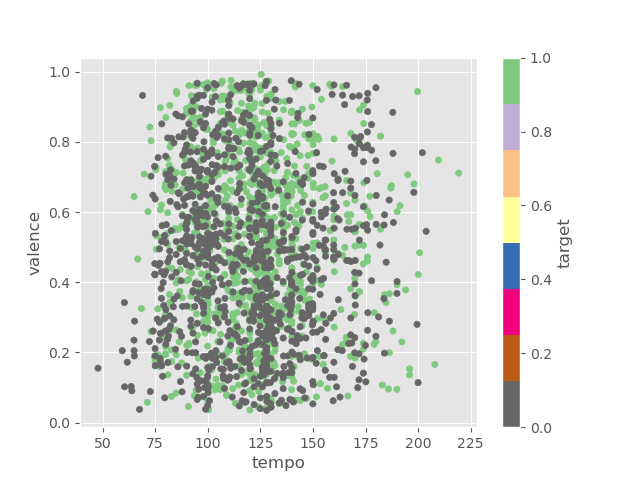

In [333]:
%matplotlib notebook
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r');

<IPython.core.display.Javascript object>


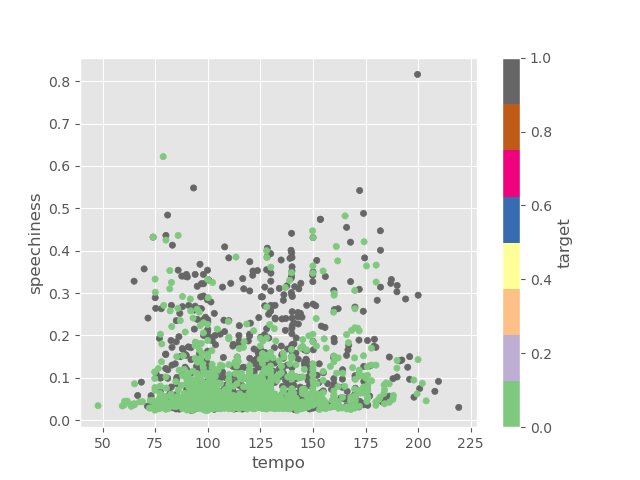

In [334]:
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent');

<IPython.core.display.Javascript object>


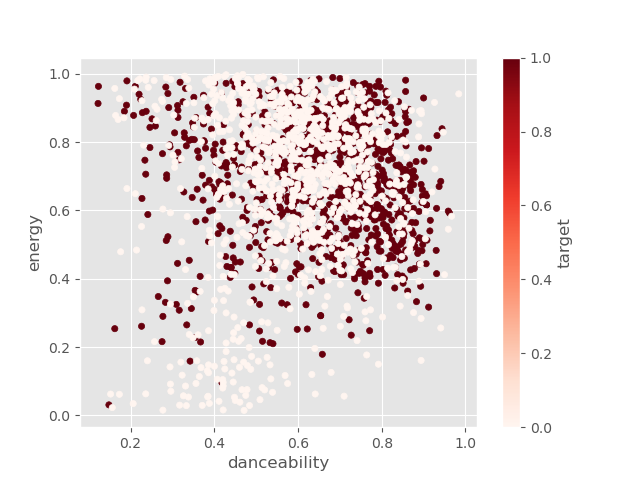

In [335]:
style.use("seaborn-colorblind")
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds');

## Separa a classe dos dados

In [336]:
classes = dataset['target']
dataset.drop('target',axis=1, inplace=True)

In [452]:
dataset.head(15)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,...,0,0,0,0,0,0,0,0,0,0
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,...,0,0,0,0,0,0,0,0,0,0
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,...,0,0,0,0,0,0,0,0,0,0
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,...,0,0,0,0,0,0,0,0,0,0
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,...,0,0,0,0,0,0,0,0,0,0


In [453]:
classes

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

## Pré-processamento de dados

In [339]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 'Valores retirados'

In [340]:
remove_features(['id','song_title'])

'Valores retirados'

In [341]:
dataset.artist.head(20)

0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
5                  Drake
6                  Drake
7                  Omega
8            Death Grips
9            Honey Claws
10        The Avalanches
11    Modern Folk Üçlüsü
12           Erkin Koray
13            Lil Yachty
14                   PNL
15       Crystal Castles
16             New Order
17            Funkadelic
18            Chief Keef
19              Le Youth
Name: artist, dtype: object

In [342]:
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist'],
      dtype='object')

In [343]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


### Label Encoder

- Técnica para codificar valores categóricos em numéricos
- Um exemplo seria: a lista de cores: ('branco','preto','amarelo','vermelho','branco')
- Após aplica o LabelEncoder se tornaria algo como (1,2,3,4,1)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [575]:
enc = LabelEncoder()

In [59]:
inteiros = enc.fit_transform(dataset['artist'])

In [60]:
# Visualizando valores únicos
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [64]:
inteiros

array([ 449,  222,  449, ...,  947, 1242,  132])

In [61]:
# Cria uma nova coluna com a nova tipificação dos artistas 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [62]:
remove_features(['artist'])

0

In [63]:
dataset.head(20)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,356
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,356
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,869
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,321
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,516


In [69]:
dataset.groupby(['key']).size().reset_index(name='counts')

,key,counts
0,0,216
1,1,257
2,2,184
3,3,63
4,4,105
5,5,166
6,6,159
7,7,212
8,8,136
9,9,191


### One Hot Encoding
- Técnica usada para codificar valores categóricos em numéricos.
- Cria uma matriz de presença.
- Resolve o problema ordenação nos dados gerados pelo LabelEncoder.
- Resolve o problema de classificação do dataframe Numpy

In [ ]:
# Apague a coluna 'Artist' -> nesse caso em especial a coluna já foi apagada.
# Estou só deixando registrado no One Hot Encoding = OHE

remove_features(['artist'])

In [70]:
# Importar o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [126]:
#Instancia um objeto do tipo OneHotEncoder
ohe = OneHotEncoder()
ohe.get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [127]:
# Transforma um array numpy em um dataset
dataset_array = dataset.values
dataset_array

array([[0.0102, 0.833, 204600, ..., 0.286, 1, 'Future'],
       [0.199, 0.743, 326933, ..., 0.588, 1, 'Childish Gambino'],
       [0.0344, 0.838, 185707, ..., 0.173, 1, 'Future'],
       ...,
       [0.00857, 0.637, 207200, ..., 0.47, 0, 'Rain Man'],
       [0.00164, 0.557, 185600, ..., 0.623, 0, 'Twin Moons'],
       [0.00281, 0.446, 204520, ..., 0.402, 0, 'Bleachers']], dtype=object)

In [128]:
# Número de linhas
num_rows = dataset_array.shape[0]
num_rows

2017

In [129]:
# Visualiza coluna de inteiros
dataset_array[:][:,13]

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

In [130]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros),1)

In [131]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [132]:
#Imprime as novas features
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [133]:
#Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [134]:
# Visualizando a quantidade de linhas e colunas da base
dataset_array.shape

(2017, 1358)

In [135]:
# transforma em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [136]:
dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357
0,0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,0.431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.199,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.604,0.494,199413,0.338,0.51,5,0.0922,-15.236,1,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.18,0.678,392893,0.561,0.512,5,0.439,-11.648,0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pandas Get_dummies

- Cria uma matriz de presença como feito com o OHE

In [591]:
dataset_Get_Dummies = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\SVM-Materiais-Apoio\data.csv",
                     sep=',')

In [592]:
classes = dataset_Get_Dummies['target']
dataset_Get_Dummies.drop('target',axis=1, inplace=True)

In [593]:
def remove_features(lista_features):
    for i in lista_features:
        dataset_Get_Dummies.drop(i, axis=1, inplace=True)
    return 'Valores retirados'

In [594]:
remove_features(['id','song_title'])

'Valores retirados'

In [595]:
dataset_Get_Dummies.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [596]:
# Aplicando o get_dummies nos dados.
dataset_Get_Dummies = pd.get_dummies(dataset_Get_Dummies, columns=['artist'], prefix=['artist'])

In [597]:
# Visualizando 'features' geradas.
dataset_Get_Dummies.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [598]:
len(dataset.columns)

1356

In [601]:
# Visualizando as colunas
dataset_Get_Dummies.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [602]:
# missing values
dataset_Get_Dummies.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

In [603]:
# Coluna artist
dataset_Get_Dummies.values[:][:,13]

array([0., 0., 0., ..., 0., 0., 0.])

In [604]:
dataset_Get_Dummies.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


## Pipeline

- O dataset tem que estar de acordo com o Get_dummies

In [628]:
datasetpipeline = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\SVM-Materiais-Apoio\data.csv",
                     sep=',')

In [629]:
datasetpipeline.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [630]:
classes = datasetpipeline['target']
datasetpipeline.drop('target',axis=1, inplace=True)

In [631]:
datasetpipeline.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist'],
      dtype='object')

In [609]:
classes

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [610]:
datasetpipeline.dtypes[:30]

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
song_title           object
artist               object
dtype: object

In [632]:
def remove_features(lista_features):
    for i in lista_features:
        datasetpipeline.drop(i, axis=1, inplace=True)
    return 'Colunas retiradas'

In [633]:
remove_features(['id','song_title'])

'Colunas retiradas'

In [634]:
datasetpipeline = pd.get_dummies(datasetpipeline, columns=['artist'], prefix=['artist'])

In [635]:
datasetpipeline.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [636]:
len(datasetpipeline.columns)

1356

In [637]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [638]:
datasetpipeline.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


In [639]:
datasetpipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Columns: 1356 entries, acousticness to artist_플랫핏 Flat Feet
dtypes: float64(10), int64(3), uint8(1343)
memory usage: 2.8 MB


In [640]:
classes.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [653]:
# Treinando o algoritmo de SVM

#pip_1,dataset_array,classes

clf = svm.SVC().fit(datasetpipeline,classes)
clf

SVC()

In [654]:
# Função que retorna a acurácia após fazer uma validação cruzada(cross validation)
def Acuracia(clf,x,y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [655]:
Acuracia(clf,datasetpipeline,classes)

0.5577590480912246

In [656]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [657]:
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [664]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipleline pip_1

Acuracia(pip_1,datasetpipeline,classes)

0.58601883986118

In [659]:
# Criando vários Pipelines

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf',svm.SVC())
])

pip_3 = Pipeline([
    ('Scaler', StandardScaler()),
    ('clf',svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('Scaler', StandardScaler()),
    ('clf',svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('Scaler', StandardScaler()),
    ('clf',svm.SVC(kernel='linear'))
])

In [675]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o diversos Pipelines

Acuracia(pip_2,datasetpipeline,classes)

0.7223599405057015

In [676]:
Acuracia(pip_3,datasetpipeline,classes)

0.58601883986118

In [677]:
Acuracia(pip_4,datasetpipeline,classes)

0.5751115518096183

## Teste com apenas LabelEncoder nos dados

In [681]:
datasetLabelEncoder = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\SVM-Materiais-Apoio\data.csv",
                     sep=',')

In [682]:
datasetLabelEncoder.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [683]:
classes = datasetLabelEncoder['target']
datasetLabelEncoder.drop('target',axis=1, inplace=True)

In [684]:
datasetLabelEncoder.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


In [685]:
def remove_features(lista_features):
    for i in lista_features:
        datasetLabelEncoder.drop(i, axis=1, inplace=True)
    return 'Colunas retiradas'

In [686]:
remove_features(['id','song_title'])

'Colunas retiradas'

In [687]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [689]:
inteiros = enc.fit_transform(datasetLabelEncoder['artist'])

In [690]:
inteiros

array([ 449,  222,  449, ...,  947, 1242,  132])

In [691]:
datasetLabelEncoder['artist_inteiros'] = inteiros

In [692]:
datasetLabelEncoder.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [693]:
remove_features(['artist'])

'Colunas retiradas'

In [694]:
datasetLabelEncoder.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [695]:
len(datasetLabelEncoder.columns)

14

In [696]:
def Acuracia(clf,x,y):
    resultados = cross_val_predict(clf, x, y, cv=10)
    return metrics.accuracy_score(y, resultados)

In [697]:
Acuracia(clf,datasetLabelEncoder,classes)

0.5582548339117501

### Testando o Desempenho dos Kernels

In [703]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1' 
# StandardScaler() - kernel='rbf'
Acuracia(pip_1,datasetLabelEncoder,classes)

0.7149231531978185

In [704]:
# MinMaxScaler()
Acuracia(pip_2,datasetLabelEncoder,classes)

0.6757560733763014

In [705]:
# ('Scaler', StandardScaler()),
# ('clf',svm.SVC(kernel='rbf'))
Acuracia(pip_3,datasetLabelEncoder,classes)

0.7149231531978185

In [706]:
# ('Scaler', StandardScaler()),
# ('clf',svm.SVC(kernel='poly'))
Acuracia(pip_4,datasetLabelEncoder,classes)

0.6683192860684184

In [707]:
# ('Scaler', StandardScaler()),
# ('clf',svm.SVC(kernel='linear'))
Acuracia(pip_5,datasetLabelEncoder,classes)

0.6236985622211205

## Tunning

In [709]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [712]:
# Lista de valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [713]:
# Define um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [716]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [717]:
grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [718]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(datasetLabelEncoder,classes)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

## Resultados de Grid

In [721]:
#Imprime os scores por combinação
grid.cv_results_

{'mean_fit_time': array([0.14754782, 0.14465439, 0.14721811, 0.18630795, 0.16639764,
        0.27044806, 0.15426633, 0.1500277 , 0.16644516, 0.18042409,
        0.24194541, 0.25787361, 0.15513656, 0.15556641, 0.14093161,
        0.15789764, 0.18444517, 0.26815124, 0.14530931, 0.12361331,
        0.12233589, 0.19260342, 0.19234443, 0.25551076, 0.12987525,
        0.13001831, 0.16506128, 0.17567945, 0.19247663, 0.24965549,
        0.13137639, 0.18239179, 0.30360546, 0.17228997, 0.17720046,
        0.27212448]),
 'std_fit_time': array([0.0109729 , 0.00723634, 0.00931349, 0.08537195, 0.01780542,
        0.03914735, 0.01311365, 0.01105434, 0.00893954, 0.04350247,
        0.05359456, 0.01390114, 0.00615924, 0.02090946, 0.02062683,
        0.01055146, 0.00920056, 0.01158884, 0.00802099, 0.01044915,
        0.01155541, 0.01994482, 0.01300613, 0.01815103, 0.00691515,
        0.00768911, 0.00762003, 0.00868227, 0.00834403, 0.00919454,
        0.00581968, 0.00640108, 0.0167902 , 0.00978709, 0.011

In [722]:
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [723]:
grid.best_score_

0.720858578395153